# Spatiotemporal dynamics c26
author: steeve.laquitaine@epfl.ch

* c26 is the longest recording: 20.25 min

activate npx

In [20]:
import os
import numpy as np
from matplotlib import pyplot as plt
import spikeinterface as si
import spikeinterface.extractors as se
import spikeinterface.preprocessing as spre

# set project path
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj85/home/laquitai/spikebias/"
os.chdir(PROJ_PATH)

# SET CONFIG
from src.nodes.utils import get_config

data_conf, param_conf = get_config("vivo_marques", "c26").values()
RAW_RECORDING_PATH = data_conf["raw"]
PREPROCESSED_PATH = data_conf["preprocessing"]["output"]["trace_file_path"]

# FIGURE SETTINGS
COLOR_VIVO = (0.2, 0.2, 0.2)
COLOR_SILI = (0.84, 0.27, 0.2)
BOX_ASPECT = 1  # square fig
LG_FRAMEON = False  # no legend frame
FIGSIZE = (6, 25)
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 24
N_MAJOR_TICKS = 6
N_MINOR_TICKS = 12
YLIM = [1e-7, 1e10]
savefig_cfg = {"transparent": True}
legend_cfg = {"frameon": False, "handletextpad": 0.1}
tight_layout_cfg = {"pad": 0.5}

2024-01-14 17:28:11,377 - root - utils.py - get_config - INFO - Reading experiment config.
2024-01-14 17:28:11,390 - root - utils.py - get_config - INFO - Reading experiment config. - done


In [3]:
# takes 1 sec
Recording_pre = si.load_extractor(PREPROCESSED_PATH)
traces_pre = Recording_pre.get_traces()

* we annotated each trace with the estimated cortical depth of the associated recording site (assuming the most superficial sites were located at the entry of L1, see figure Marques et al.). Each row is separated by 20 um (as described in Jun et al. 2017).
* we annotated inferred layers of site's cortical depth

In [4]:
layer_border = np.array(
    [
        param_conf["layer_border"]["L1"],
        param_conf["layer_border"]["L2_3"],
        param_conf["layer_border"]["L4"],
        param_conf["layer_border"]["L5"],
        param_conf["layer_border"]["L6"],
    ]
)

array([ 117,  530,  866, 1300, 2270])

In [5]:
# from 380 (superficial sites near pial) to 0 (deeper sites)
col_1_contact_ids = np.arange(0, 384, 4)  # probe column 1
# col_3_contact_ids = np.arange(1, 384, 4)  # probe column 3

In [93]:
col_1_contact_ids

array([  0,   4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48,
        52,  56,  60,  64,  68,  72,  76,  80,  84,  88,  92,  96, 100,
       104, 108, 112, 116, 120, 124, 128, 132, 136, 140, 144, 148, 152,
       156, 160, 164, 168, 172, 176, 180, 184, 188, 192, 196, 200, 204,
       208, 212, 216, 220, 224, 228, 232, 236, 240, 244, 248, 252, 256,
       260, 264, 268, 272, 276, 280, 284, 288, 292, 296, 300, 304, 308,
       312, 316, 320, 324, 328, 332, 336, 340, 344, 348, 352, 356, 360,
       364, 368, 372, 376, 380])

In [94]:
layers = Recording_pre.get_property("layers")
layers

array(['WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM',
       'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM',
       'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM',
       'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM',
       'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM',
       'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM',
       'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM',
       'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM',
       'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM',
       'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM',
       'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM',
       'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM',
       'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM',
       'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'WM', 'W

* we only plot the sites of two of the four columns (1 and 3) located at the same depth.

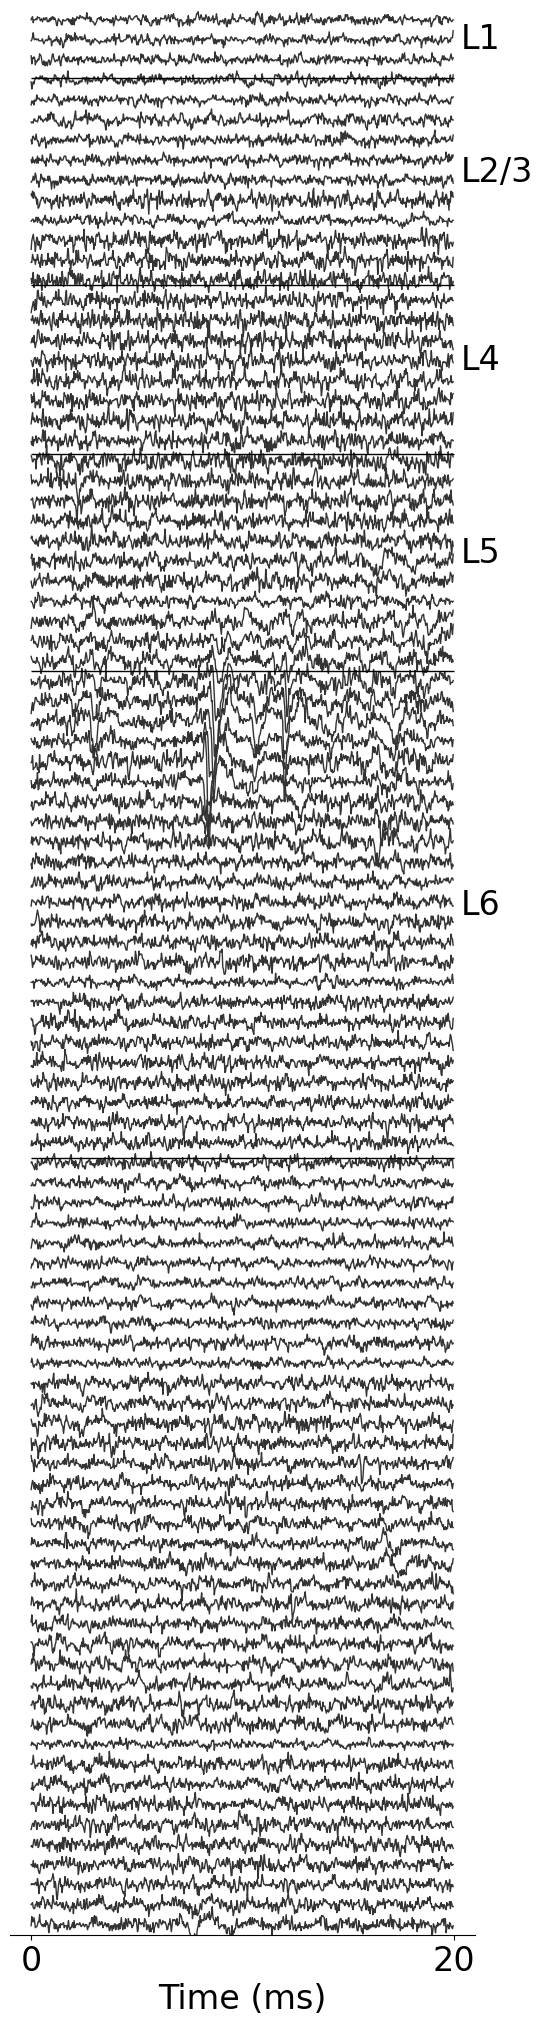

In [96]:
NUM = 65  # 64, 3, # index of contiguous period to plot
LINEWIDTH = 1
SAMPFREQ = 30000  # Hz
DURATION_MS = 20

REAL_Y_PITCH = 40  # um (2 x 20 um because of checkerboard geometry)
PLOT_Y_PITCH = 20  # a.u.
N_SITE_BY_COL = 96
Y_MAX = PLOT_Y_PITCH * 95

n_timepoints = int(DURATION_MS * SAMPFREQ / 1000)
period = np.arange((NUM - 1) * n_timepoints, NUM * n_timepoints, 1)  # timepoints

plot_layer_border = PLOT_Y_PITCH * layer_border / REAL_Y_PITCH
layer_start = np.hstack([0, plot_layer_border])[:-1]
annot_layers_pos = np.vstack([layer_start, plot_layer_border])
annot_layers_pos = np.mean(annot_layers_pos, axis=0)
annot_layers_pos = PLOT_Y_PITCH * 95 - annot_layers_pos
layers = ["L1", "L2/3", "L4", "L5", "L6"]


# layer bottom boundary on plot
layer_bottom_boundary_to_plot = Y_MAX - plot_layer_border

# calculate site depths
site_depth = np.flip(
    np.cumsum(np.hstack([0, np.array([REAL_Y_PITCH] * (N_SITE_BY_COL - 1))]))
)

# figure
fig, ax = plt.subplots(1, 1, figsize=FIGSIZE)

# probe column 1
pos_up_all = []
pos_up = 0
y_pitch = 0
center_pos_up = 2
for ix in range(len(col_1_contact_ids)):
    pos_up_all.append(pos_up - center_pos_up)
    plt.plot(
        traces_pre[period, col_1_contact_ids[ix]] + pos_up,
        linewidth=LINEWIDTH,
        color=COLOR_VIVO,
    )
    pos_up += PLOT_Y_PITCH

# annotate layers
for ix in range(len(annot_layers_pos)):
    ax.text(
        610,
        annot_layers_pos[ix],
        "%s" % (str(layers[ix])),
        size=plt.rcParams["font.size"],
        zorder=100,
        color="k",
        ha="left",
    )

# legend
ax.spines[["left", "top", "right"]].set_visible(False)
ax.set_xticks([0, n_timepoints])
ax.set_xticklabels([0, 20])
ax.set_xlabel("Time (ms)")
ax.set_ylim([-10, Y_MAX + 10])
plt.yticks([])

# plot layer borders
ax.hlines(
    y=layer_bottom_boundary_to_plot[0], xmin=0, xmax=600, color="black", linewidth=1
)
ax.hlines(
    y=layer_bottom_boundary_to_plot[1], xmin=0, xmax=600, color="black", linewidth=1
)
ax.hlines(
    y=layer_bottom_boundary_to_plot[2], xmin=0, xmax=600, color="black", linewidth=1
)
ax.hlines(
    y=layer_bottom_boundary_to_plot[3], xmin=0, xmax=600, color="black", linewidth=1
)
ax.hlines(
    y=layer_bottom_boundary_to_plot[4], xmin=0, xmax=600, color="black", linewidth=1
)

# save figures
plt.savefig(
    "figures/2_realism/2_dynamics/pdf/marques/vivo_marques_dynamics.pdf", **savefig_cfg
)
plt.savefig(
    "figures/2_realism/2_dynamics/svg/marques/vivo_marques_dynamics.svg", **savefig_cfg
)